In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import math

In [16]:
def IntTrapz(f,x):
    I=0.5*(f(x[0])+f(x[-1]))
    h=x[1]-x[0]
    for i in range(1,len(x)-1):
        I+=f(x[i])
    I*=h
    return I

In [17]:
def IntSimpson(f,x):
    xm=(x[0]+x[-1])/2
    h=(x[-1]-x[0])/2
    I=(h/3)*(f(x[0])+4*f(xm)+f(x[-1]))
    return I

In [18]:
def IntSimpComp(f,x):
    h=x[1]-x[0]
    I=f[-1]+f[0]

    for i in range(len(f[1:-1])):
        if i%2 ==0:
            I+=4*f[i+1]
        else:
            I+=2*f[i+1]
    
    I*=(h/3)
    return I


In [19]:
def funcion(x):
    a=0.01/100
    R=0.5/100
    num=np.sqrt((a**2)-x**2)
    den=R+x
    return num/den

In [20]:
x=np.linspace(-0.01/100,0.01/100,100)
y=funcion(x)

Text(0, 0.5, 'y(x)')

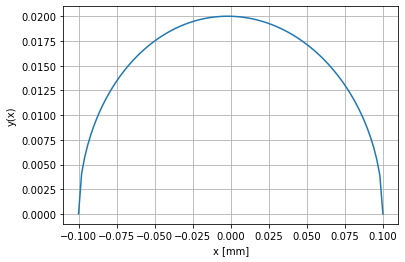

In [21]:
plt.plot(x*1000,y)
plt.grid()
plt.xlabel('x [mm]')
plt.ylabel('y(x)')

In [22]:
def DiscDerivative(f,x):  
    d=np.zeros(len(f))
    h=x[1]-x[0]
    for i in range(2,len(f)-2):
        d[i] = f[i+2] - 4*f[i+1] + 6*f[i] - 4*f[i-1] + f[i-2]
        d[i] /= (x[1]-x[0])**4 
    return d

In [23]:
def GetDerivative(f,x):  
    h=x[1]-x[0]
    d = f(x + 2*h) - 4*f(x + h) + 6*f(x) - 4*f(x - h) + f(x - 2*h)
    d /= h**4 
    return d

In [24]:
Error=0.5/100
SeDer=GetDerivative(funcion,x)
SegDer=np.nan_to_num(SeDer)
CuartDer=DiscDerivative(SegDer,x)
max_=np.max(np.abs(SegDer))
max2_=np.max(np.abs(CuartDer))
h_trapz=np.sqrt(Error*12/((0.02/100)*max_))
h_Simp=(Error*180/((0.02/100)*(max2_)))**(1/4)
N_trapz=math.ceil((0.02/100)/h_trapz)
N_Simp=math.ceil((0.02/100)/h_Simp)

<ipython-input-19-a7ef76f3397b>:4: RuntimeWarning: invalid value encountered in sqrt
  num=np.sqrt((a**2)-x**2)


In [26]:
x_trapz=np.linspace(-0.01/100,0.01/100,N_trapz)
x_Simp=np.linspace(-0.01/100,0.01/100,N_Simp)
I_trapz=IntTrapz(funcion,x_trapz)
I_Simp=IntSimpson(funcion,x_Simp)
I_Comp=IntSimpComp(funcion(x_Simp),x_Simp)
I_Comp


3.1419068742516417e-06

In [34]:
ValorReal=np.pi*((0.5/100)-np.sqrt((0.5/100)**2-(0.01/100)**2))
Error_trapz=(np.abs(ValorReal-I_trapz)/ValorReal)*100
Error_Simp=(np.abs(ValorReal-I_Comp)/ValorReal)*100
Errores=[Error_trapz, Error_Simp]
Errores


[2.6016716808269284e-06, 4.622757317101371e-08]